In [281]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [282]:
HistTrans=pd.read_csv('Historical-transaction-data.csv')
StoreInfo = pd.read_csv('Store-info.csv')
Test = pd.read_csv('Testing-data.csv')

In [283]:
df = HistTrans.copy()

In [284]:
HistTrans

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09T00:00:00.000Z,NaN,X21A,SHOP056,440,3
473970,LEMONADE 1.5L,2021-12-02T00:00:00.000Z,NaN,LV2L,SHOP018,220,2
473971,FIT O ORANGE 200ML,2021-11-19T00:00:00.000Z,NaN,VC4O,SHOP077,210,4
473972,CREAM SODA 1.5L,2021-12-03T00:00:00.000Z,NaN,MSBQ,SHOP077,440,3


In [285]:
col1_min = HistTrans['item_price'].min()
col1_max = HistTrans['item_price'].max()

col2_min = HistTrans['quantity_sold'].min()
col2_max = HistTrans['quantity_sold'].max()

In [286]:
col1_min,col1_max

(35, 17400)

In [287]:
col2_min,col2_max

(-1, 101)

In [288]:
HistTrans = HistTrans[HistTrans['quantity_sold'] > 0]

In [289]:
df = HistTrans.copy()

In [290]:
HistTrans.isna().sum()

item_description    35554
transaction_date        0
invoice_id           6216
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

In [291]:
df1 = StoreInfo.copy()

In [292]:
df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09T00:00:00.000Z,NaN,X21A,SHOP056,440,3
473970,LEMONADE 1.5L,2021-12-02T00:00:00.000Z,NaN,LV2L,SHOP018,220,2
473971,FIT O ORANGE 200ML,2021-11-19T00:00:00.000Z,NaN,VC4O,SHOP077,210,4
473972,CREAM SODA 1.5L,2021-12-03T00:00:00.000Z,NaN,MSBQ,SHOP077,440,3


In [293]:
HistTrans.isna().sum()

item_description    35554
transaction_date        0
invoice_id           6216
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

### Create new Features

In [294]:
df['SALE_AMOUNT'] = df['item_price'] * df['quantity_sold']

In [295]:
df['transaction_date'] = df['transaction_date'].str.split('T', n=1, expand=True)[0]

In [296]:
# convert Date column to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# create new column Month with two-digit format
df['MONTH'] = df['transaction_date'].dt.strftime('%m')

In [297]:
# fill NaN values with empty string
# df['item_description'] = df['item_description'].fillna('')


# create a new column 'BRAND' by splitting the ITEM string and taking the first element
df['BRAND'] = df['item_description'].str.split().str[:-1].str.join(' ')

# create a new column 'CAPACITY' by splitting the ITEM string and taking the last element
df['CAPACITY'] = df['item_description'].str.split().str[-1]

def process_value(val):
    if pd.notnull(val):  # ignore NaN values
        if 'ML' in val:
            val = val.replace('ML', '').strip()
            val = (float(val) / 1000)  
        elif 'L' in val:
            val = val.replace('L', '').strip()
            val = int(float(val))  # convert to int
    return val

# apply the function to the column
df['CAPACITY'] = df['CAPACITY'].apply(process_value)

In [298]:
df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,SALE_AMOUNT,MONTH,BRAND,CAPACITY
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220,2,440,12,ORANGE BARLEY,1.00
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220,2,440,10,GINGER BEER,1.00
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160,2,320,12,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,150,2,300,12,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210,5,1050,10,STRAWBERRY MILK,0.18
...,...,...,...,...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09,NaN,X21A,SHOP056,440,3,1320,12,NECTO,1.00
473970,LEMONADE 1.5L,2021-12-02,NaN,LV2L,SHOP018,220,2,440,12,LEMONADE,1.00
473971,FIT O ORANGE 200ML,2021-11-19,NaN,VC4O,SHOP077,210,4,840,11,FIT O ORANGE,0.20
473972,CREAM SODA 1.5L,2021-12-03,NaN,MSBQ,SHOP077,440,3,1320,12,CREAM SODA,1.00


In [299]:
df1

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low
...,...,...,...
119,SHOP087,527,NaN
120,SHOP050,411,NaN
121,SHOP061,699,NaN
122,SHOP056,597,NaN


In [300]:
df.isna().sum()

item_description    35554
transaction_date        0
invoice_id           6216
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
SALE_AMOUNT             0
MONTH                   0
BRAND               35554
CAPACITY            35554
dtype: int64

In [301]:
df.columns

Index(['item_description', 'transaction_date', 'invoice_id', 'customer_id',
       'shop_id', 'item_price', 'quantity_sold', 'SALE_AMOUNT', 'MONTH',
       'BRAND', 'CAPACITY'],
      dtype='object')

### Create new features

In [302]:
sales_by_shop = df.groupby('shop_id')['SALE_AMOUNT'].sum().reset_index()
# sales_by_shop

In [303]:
df1 = df1.merge(sales_by_shop, how='left', on='shop_id')
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT
0,SHOP047,528,Moderate,842960
1,SHOP009,676,High,1970870
2,SHOP083,676,Low,1691985
3,SHOP117,676,Low,2326200
4,SHOP042,676,Low,1340215
...,...,...,...,...
119,SHOP087,527,NaN,1128935
120,SHOP050,411,NaN,2399125
121,SHOP061,699,NaN,2110800
122,SHOP056,597,NaN,3024315


In [304]:
df1['sale_amount_per_sqft'] = df1['SALE_AMOUNT'] / df1['shop_area_sq_ft']
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft
0,SHOP047,528,Moderate,842960,1596.515152
1,SHOP009,676,High,1970870,2915.488166
2,SHOP083,676,Low,1691985,2502.936391
3,SHOP117,676,Low,2326200,3441.124260
4,SHOP042,676,Low,1340215,1982.566568
...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,2142.191651
120,SHOP050,411,NaN,2399125,5837.287105
121,SHOP061,699,NaN,2110800,3019.742489
122,SHOP056,597,NaN,3024315,5065.854271


In [305]:
customers_per_shop = HistTrans.groupby('shop_id')['customer_id'].nunique().reset_index(name='num_unique_customers')
customers_per_shop

,shop_id,num_unique_customers
0,SHOP001,1106
1,SHOP002,2546
2,SHOP003,2038
3,SHOP004,1724
4,SHOP005,2189
...,...,...
119,SHOP123,1146
120,SHOP124,2251
121,SHOP125,886
122,SHOP126,1742


In [306]:
df1 = df1.merge(customers_per_shop, how='left', on='shop_id')
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft,num_unique_customers
0,SHOP047,528,Moderate,842960,1596.515152,920
1,SHOP009,676,High,1970870,2915.488166,2476
2,SHOP083,676,Low,1691985,2502.936391,1876
3,SHOP117,676,Low,2326200,3441.124260,2015
4,SHOP042,676,Low,1340215,1982.566568,1826
...,...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,2142.191651,1061
120,SHOP050,411,NaN,2399125,5837.287105,1765
121,SHOP061,699,NaN,2110800,3019.742489,1725
122,SHOP056,597,NaN,3024315,5065.854271,2810


In [308]:
item_per_shop = HistTrans.groupby('shop_id')['item_description'].nunique().reset_index(name='num_unique_items')
item_per_shop

,shop_id,num_unique_items
0,SHOP001,35
1,SHOP002,35
2,SHOP003,35
3,SHOP004,35
4,SHOP005,36
...,...,...
119,SHOP123,36
120,SHOP124,35
121,SHOP125,36
122,SHOP126,31


In [318]:
num_transactions_per_shop = HistTrans.groupby('shop_id').size().reset_index(name='num_transactions')
num_transactions_per_shop

,shop_id,num_transactions
0,SHOP001,1980
1,SHOP002,4721
2,SHOP003,3597
3,SHOP004,3392
4,SHOP005,4138
...,...,...
119,SHOP123,2035
120,SHOP124,4366
121,SHOP125,1838
122,SHOP126,3141


In [321]:
df1 = df1.merge(num_transactions_per_shop, how='left', on='shop_id')
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft,num_unique_customers,num_unique_items,num_transactions
0,SHOP047,528,Moderate,842960,1596.515152,920,35,1662
1,SHOP009,676,High,1970870,2915.488166,2476,35,4517
2,SHOP083,676,Low,1691985,2502.936391,1876,36,3550
3,SHOP117,676,Low,2326200,3441.124260,2015,35,4015
4,SHOP042,676,Low,1340215,1982.566568,1826,35,3219
...,...,...,...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,2142.191651,1061,35,1991
120,SHOP050,411,NaN,2399125,5837.287105,1765,31,3875
121,SHOP061,699,NaN,2110800,3019.742489,1725,35,3072
122,SHOP056,597,NaN,3024315,5065.854271,2810,35,5663


In [322]:
df1['sales_per_customer'] = df1['SALE_AMOUNT']/df1['num_transactions']
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft,num_unique_customers,num_unique_items,num_transactions,sales_per_customer
0,SHOP047,528,Moderate,842960,1596.515152,920,35,1662,507.196149
1,SHOP009,676,High,1970870,2915.488166,2476,35,4517,436.322781
2,SHOP083,676,Low,1691985,2502.936391,1876,36,3550,476.615493
3,SHOP117,676,Low,2326200,3441.124260,2015,35,4015,579.377335
4,SHOP042,676,Low,1340215,1982.566568,1826,35,3219,416.345138
...,...,...,...,...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,2142.191651,1061,35,1991,567.019086
120,SHOP050,411,NaN,2399125,5837.287105,1765,31,3875,619.129032
121,SHOP061,699,NaN,2110800,3019.742489,1725,35,3072,687.109375
122,SHOP056,597,NaN,3024315,5065.854271,2810,35,5663,534.048208


### Check NaN values

In [325]:
len(df1['shop_id'].unique().tolist())

124

### Drop unwanted Features

In [91]:
df.drop(['item_description', 'transaction_date','invoice_id','customer_id'], axis=1, inplace=True)

In [145]:
df1.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile', 'SALE_AMOUNT',
       'sale_amount_per_sqft', 'num_unique_customers', 'num_transactions',
       'sales_per_customer', 'num_unique_items'],
      dtype='object')

In [135]:
cols = ['shop_area_sq_ft','SALE_AMOUNT','sale_amount_per_sqft','num_unique_customers','num_transactions','sales_per_customer','num_unique_items']

### Check outliers

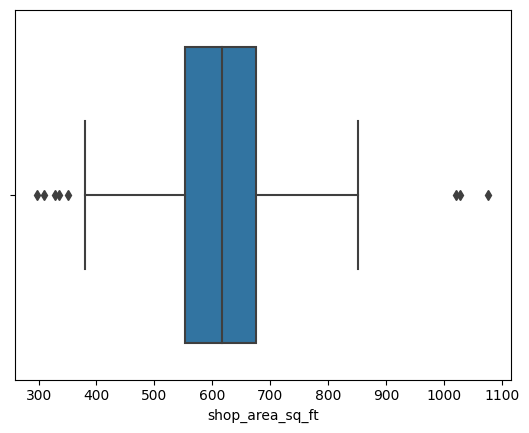

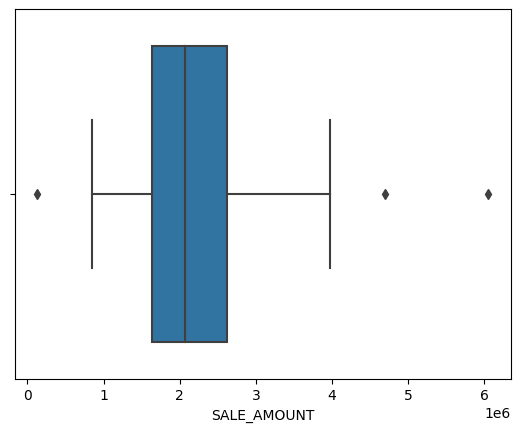

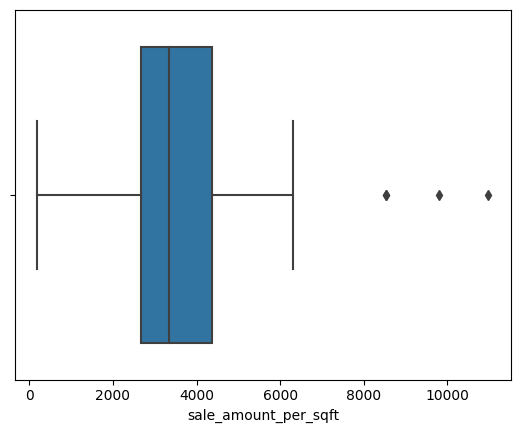

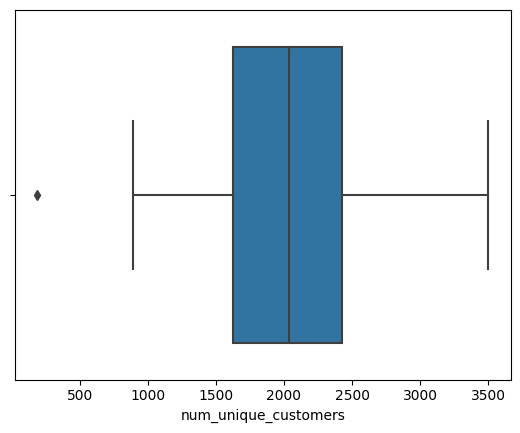

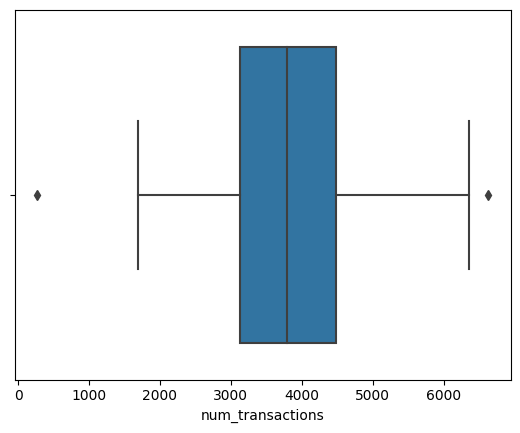

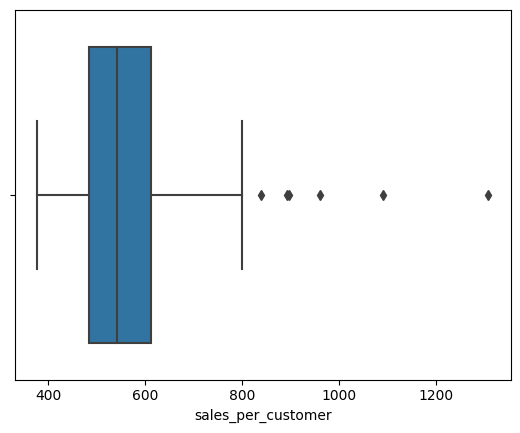

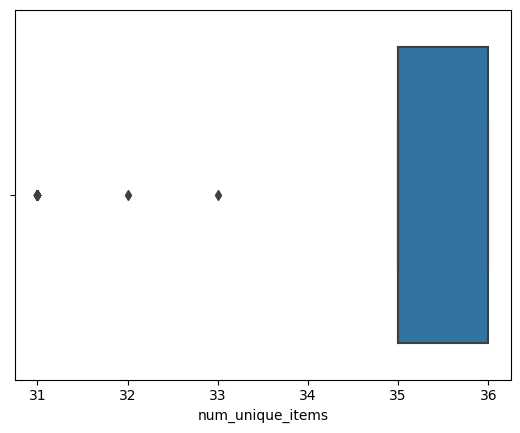

In [140]:
# # assume the DataFrame is called df
# for col in cols:
#     sns.boxplot(x=df1[col])
#     plt.show()

In [147]:
# df1.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile', 'SALE_AMOUNT',
       'sale_amount_per_sqft', 'num_unique_customers', 'num_transactions',
       'sales_per_customer', 'num_unique_items'],
      dtype='object')

In [148]:
# out_df = df1.drop(columns=["shop_id",'shop_profile'])

In [149]:
# # Seperate normally distributed columns and skewed columns based on Shapiro test and skewness
# from scipy.stats import shapiro, skew

# def get_skew_colsss(df):
#     p_values = [shapiro(df[col])[1] for col in df.columns]
#     skewness = [skew(df[col]) for col in df.columns]

#     normal_cols = [i for i, p in zip(df.columns,p_values) if p > 0.5]
#     skewed_cols = [i for i,s in zip(df.columns,skewness) if abs(s) > 0.5]

#     return normal_cols,skewed_cols

In [151]:
# # train data
# normal_cols, skewed_cols = get_skew_colsss(out_df)

In [152]:
# normal_cols

['num_unique_customers', 'num_transactions']

In [153]:
# skewed_cols

['SALE_AMOUNT',
 'sale_amount_per_sqft',
 'sales_per_customer',
 'num_unique_items']

In [ ]:
# # Function to handle outliers based on Inter Quartile Range method
# def outlier_handler_skewed(df,col,option):
#     # step 1: calculate IQR
#     Q1 = df[col].quantile(0.25)
#     Q3=df[col].quantile(0.75)
#     IQR = Q3-Q1

#     # step 2: calculate upper and lower bounds for each column 
#     lower = Q1 - 1.5*(IQR)
#     upper = Q3 + 1.5*(IQR)

    
#     if option=="drop":

#         df.drop(df.loc[df[col]<lower].index,inplace=True)

#         df.drop(df.loc[df[col]>upper].index,inplace=True)

#     elif option=="fill_Qrt":

#         df[col] = np.where(df[col] < lower, lower, df[col])

#         df[col] = np.where(df[col] > upper, upper, df[col])
        
    
#     elif option =="fill_mean":
#         df[col] = np.where(df[col] < lower, df[col].mean() , df[col])
#         df[col] = np.where(df[col] > upper, df[col].mean() , df[col])
        
#     elif option =="fill_median":
#         df[col] = np.where(df[col] < lower, df[col].median(), df[col])
#         df[col] = np.where(df[col] > upper, df[col].median(), df[col])  

In [ ]:
# # handle outliers in train set
# for i in cols:
#     outlier_handler_skewed(df1_x,i,'fill_median')

In [ ]:
# # handle outliers in train set
# for i in cols:
#     outlier_handler_skewed(df1_x,i,'fill_median')

### Divide Train and Test data

In [326]:
df1

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft,num_unique_customers,num_unique_items,num_transactions,sales_per_customer
0,SHOP047,528,Moderate,842960,1596.515152,920,35,1662,507.196149
1,SHOP009,676,High,1970870,2915.488166,2476,35,4517,436.322781
2,SHOP083,676,Low,1691985,2502.936391,1876,36,3550,476.615493
3,SHOP117,676,Low,2326200,3441.124260,2015,35,4015,579.377335
4,SHOP042,676,Low,1340215,1982.566568,1826,35,3219,416.345138
...,...,...,...,...,...,...,...,...,...
119,SHOP087,527,NaN,1128935,2142.191651,1061,35,1991,567.019086
120,SHOP050,411,NaN,2399125,5837.287105,1765,31,3875,619.129032
121,SHOP061,699,NaN,2110800,3019.742489,1725,35,3072,687.109375
122,SHOP056,597,NaN,3024315,5065.854271,2810,35,5663,534.048208


In [345]:
df_pred = df1[pd.isnull(df1['shop_profile'])]

In [346]:
df_pred

,shop_id,shop_area_sq_ft,shop_profile,SALE_AMOUNT,sale_amount_per_sqft,num_unique_customers,num_unique_items,num_transactions,sales_per_customer
100,SHOP046,545,NaN,2607865,4785.073394,1713,35,3387,769.963094
101,SHOP024,676,NaN,1308795,1936.087278,1628,35,2839,461.005636
102,SHOP023,617,NaN,2570425,4166.004862,2206,36,4031,637.664351
103,SHOP097,310,NaN,2642380,8523.806452,1647,31,3098,852.930923
104,SHOP044,715,NaN,1310440,1832.783217,1533,35,2594,505.181187
105,SHOP030,530,NaN,2862995,5401.877358,1616,35,3558,804.664137
106,SHOP038,411,NaN,1444025,3513.442822,1755,31,3080,468.839286
107,SHOP029,597,NaN,1973805,3306.206030,2035,35,3740,527.755348
108,SHOP096,676,NaN,2600915,3847.507396,2469,35,4723,550.691298
109,SHOP092,617,NaN,1961240,3178.670989,2230,35,3848,509.677755


In [347]:
df2 = df1.dropna()

In [348]:
# X = df2.drop(['shop_profile', 'shop_id'], axis=1)
# y = df2['shop_profile']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [349]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score

# # Create a Random Forest Classifier with 100 trees
# rf = RandomForestClassifier(n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_depth=10, bootstrap=False)

In [350]:
# rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       n_estimators=700)

In [352]:
# y_pred = rf.predict(X_test)

In [353]:
# f1 = f1_score(y_test, y_pred, average='macro')
# print("F1 score:", f1)

F1 score: 0.5457875457875457


In [402]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_classif

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# instantiate SelectKBest
kbest = SelectKBest(score_func=mutual_info_classif, k=3)
X_new = kbest.fit_transform(X_poly_df, y)

# get selected feature names
X_poly_df.columns[kbest.get_support()]

Index(['shop_area_sq_ft num_unique_customers^2',
       'shop_area_sq_ft num_unique_customers num_unique_items',
       'SALE_AMOUNT sale_amount_per_sqft sales_per_customer'],
      dtype='object')

In [395]:
X_new_df = pd.DataFrame(X_new, columns=X_poly_df.columns[kbest.get_support()])

In [396]:
X_new_df

,shop_area_sq_ft num_unique_customers^2,shop_area_sq_ft num_unique_customers num_unique_items,SALE_AMOUNT sale_amount_per_sqft sales_per_customer
0,4.468992e+08,17001600.0,6.825838e+11
1,4.144269e+09,58582160.0,2.507132e+12
2,2.379098e+09,45654336.0,2.018434e+12
3,2.744712e+09,47674900.0,4.637767e+12
4,2.253971e+09,43203160.0,1.106256e+12
...,...,...,...
95,3.070603e+09,47743710.0,9.873695e+12
96,5.250000e+08,13440000.0,2.115305e+12
97,1.542146e+09,36494325.0,2.917660e+12
98,1.533643e+09,31135440.0,2.218214e+12


In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, test_size=0.3, random_state=42)

In [398]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_depth=1000, bootstrap=False)

In [399]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=1000, min_samples_leaf=2,
                       n_estimators=700)

In [400]:
y_pred = rf.predict(X_test)

In [401]:
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score:", f1)

F1 score: 0.6722222222222222
